# Классификация вин

Подключение библиотек

In [157]:
# Датасет
from sklearn.datasets import load_wine

# Последовательная модель НС
from tensorflow.keras.models import Sequential

# Основные слои
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization

# Утилиты для to_categorical()
from tensorflow.keras import utils

# Алгоритмы оптимизации для обучения модели
from tensorflow.keras.optimizers import Adam

# Библиотека для работы с массивами
import numpy as np

# Отрисовка графиков
import matplotlib.pyplot as plt

# Разделение данных на выборки
from sklearn.model_selection import train_test_split

### Исследование датасета

Загрузка данных

In [158]:
x_data = load_wine()['data']              # Загрузка набора данных о винах
y_data = load_wine()['target']            # Загрузка классов вин

print('Размерность x_data -', x_data.shape)
print('Размерность y_data -', y_data.shape)
print()

# Вывод примера данных
print('Данные по первому вину:',x_data[0])
print('Класс вина:',y_data[0])

Размерность x_data - (178, 13)
Размерность y_data - (178,)

Данные по первому вину: [1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
Класс вина: 0


### Подготовка данных

In [159]:
# Перевод в one hot encoding
y_data = utils.to_categorical(y_data, 3)

# Разбиение наборов на общую и тестовую выборки
x_all, x_test, y_all, y_test = train_test_split(x_data,
                                                y_data,
                                                test_size=0.1,
                                                shuffle=True,
                                                random_state = 6)

# Разбиение общей выборки на обучающую и проверочную
x_train, x_val, y_train, y_val = train_test_split(x_all,
                                                  y_all,
                                                  test_size=0.1,
                                                  shuffle=True,
                                                  random_state = 6)

print('Обучающая выборка X:', x_train.shape)
print('Обучающая выборка Y:',y_train.shape)
print('Валидационная выборка X:',x_val.shape)
print('Валидационная выборка Y:',y_val.shape)
print('Тестовая выборка X:',x_test.shape)
print('Тестовая выборка Y:',y_test.shape)

Обучающая выборка X: (144, 13)
Обучающая выборка Y: (144, 3)
Валидационная выборка X: (16, 13)
Валидационная выборка Y: (16, 3)
Тестовая выборка X: (18, 13)
Тестовая выборка Y: (18, 3)


# Создание модели c accuracy > 0.94

Создание модели для подбора гиперпараметров

In [160]:
def create_model(neurons, learning_rate):
    model = Sequential()
    model.add(Dense(neurons, input_dim=13))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(3, activation='softmax'))
    
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model

Подбор гиперпараметров

In [161]:
# Подбор гиперпараметров
neurons = [32, 64, 128, 256, 512]
learning_rates = [0.001, 0.002, 0.003, 0.004, 0.005]

best_accuracy = []
best_neurons = []
best_learning_rate = []

for neuron in neurons:
    for learning_rate in learning_rates:
        model = create_model(neuron, learning_rate)
        history = model.fit(x_train, y_train, batch_size=32, epochs=50, validation_data=(x_val, y_val), verbose=0)
        best_accuracy.append(max(history.history['val_accuracy']))
        best_neurons.append(neuron)
        best_learning_rate.append(learning_rate)


In [162]:
best_params = sorted(list(zip(best_accuracy, best_neurons, best_learning_rate)), reverse=True)

for i in range(10):
    print(f'Accuracy: {best_params[i][0]}, Нейронов: {best_params[i][1]}, Скорость обучения: {best_params[i][2]}')
    

Accuracy: 1.0, Нейронов: 512, Скорость обучения: 0.001
Accuracy: 1.0, Нейронов: 128, Скорость обучения: 0.002
Accuracy: 1.0, Нейронов: 128, Скорость обучения: 0.001
Accuracy: 1.0, Нейронов: 64, Скорость обучения: 0.005
Accuracy: 1.0, Нейронов: 64, Скорость обучения: 0.004
Accuracy: 1.0, Нейронов: 64, Скорость обучения: 0.003
Accuracy: 1.0, Нейронов: 32, Скорость обучения: 0.005
Accuracy: 0.9375, Нейронов: 512, Скорость обучения: 0.005
Accuracy: 0.9375, Нейронов: 512, Скорость обучения: 0.004
Accuracy: 0.9375, Нейронов: 512, Скорость обучения: 0.003


Пробуем обучить модель с лучшими параметрами

- Нейронов: 512, Скорость обучения: 0.001
- Нейронов: 128, Скорость обучения: 0.001
- Нейронов: 128, Скорость обучения: 0.002

#### Нейронов: 512, Скорость обучения: 0.001

Точность на тестовой выборке: 0.9444444179534912


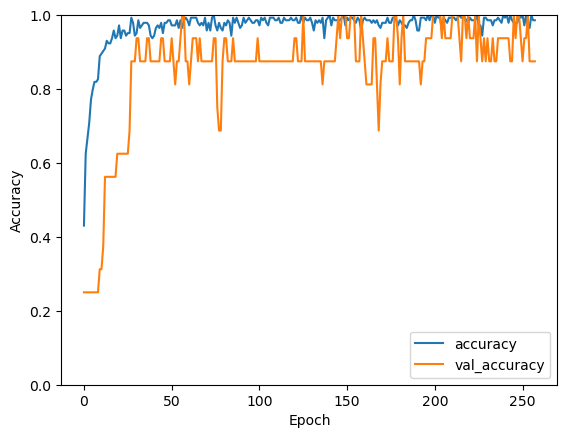

In [177]:
model = create_model(512, 0.001)
history = model.fit(x_train, y_train, batch_size=32, epochs=258, validation_data=(x_val, y_val), verbose=0)

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('Точность на тестовой выборке:', test_acc)

#### Нейронов: 128, Скорость обучения: 0.001

Точность на тестовой выборке: 0.9444444179534912


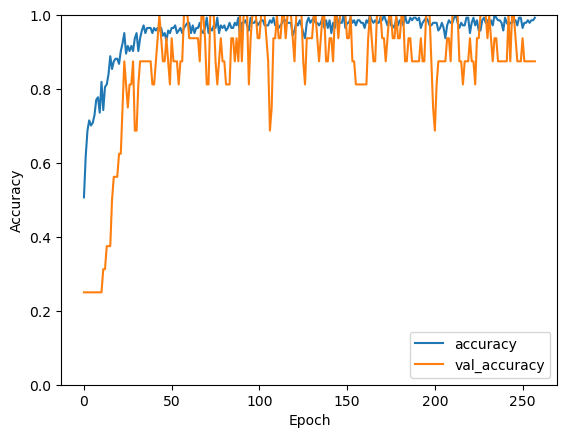

In [178]:
model = create_model(128, 0.001)
history = model.fit(x_train, y_train, batch_size=32, epochs=258, validation_data=(x_val, y_val), verbose=0)

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('Точность на тестовой выборке:', test_acc)

#### Нейронов: 128, Скорость обучения: 0.002

Точность на тестовой выборке: 1.0


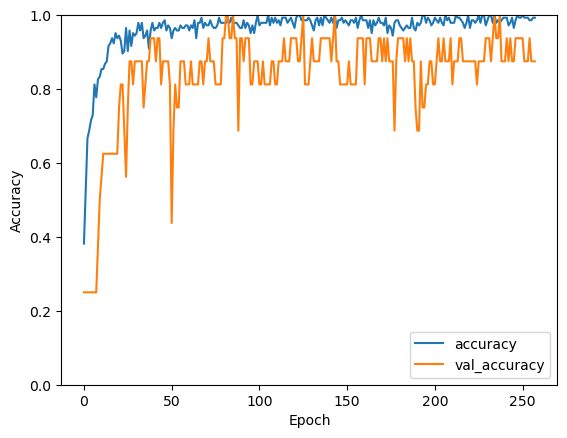

In [179]:
model = create_model(128, 0.002)
history = model.fit(x_train, y_train, batch_size=32, epochs=258, validation_data=(x_val, y_val), verbose=0)

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('Точность на тестовой выборке:', test_acc)

In [180]:
# Фиксируем количество параметров
model = create_model(128, 0.002)
model.summary()

Model: "sequential_336"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_669 (Dense)           (None, 128)               1792      
                                                                 
 batch_normalization_336 (Ba  (None, 128)              512       
 tchNormalization)                                               
                                                                 
 activation_336 (Activation)  (None, 128)              0         
                                                                 
 dropout_336 (Dropout)       (None, 128)               0         
                                                                 
 dense_670 (Dense)           (None, 3)                 387       
                                                                 
Total params: 2,691
Trainable params: 2,435
Non-trainable params: 256
________________________________________________

# Выводы

- Наилучший результат показала модель с 128 нейронами и скоростью обучения 0.002
- Точность на тестовой выборке: 1
- Количество параметров: 2,691